In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from inline_sql import sql, sql_val

In [3]:
data = pd.read_csv("NY-House-Dataset.csv")
print(data)

                                            BROKERTITLE                TYPE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                   Brokered by Serhant      Condo for sale   
2                                Brokered by Sowae Corp      House for sale   
3                                   Brokered by COMPASS      Condo for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
4796                                Brokered by COMPASS      Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc      Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave      Co-op for sale   
4799            Brokered by E Realty International Corp      Condo for sale   
4800                 Brokered by Nyc Realty Brokers Llc      Co-op for sale   

          PRICE  BEDS       BATH  PROPERTYSQFT  \
0

In [6]:
consultaPrecios = """
                SELECT PRICE
                FROM data
                """

In [14]:
precios = sql^consultaPrecios

In [31]:
#outliers

# primer cuartil
q1 = np.quantile(precios, 0.25)
 
# tercer cuartil
q3 = np.quantile(precios, 0.75)
med = np.median(precios)
 
# reg intercuartil
iqr = q3-q1
 
# maximo y minimo
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

In [42]:
precios2 = np.array(precios)
precios2 = precios2[(precios > lower_bound) & (precios < upper_bound)]

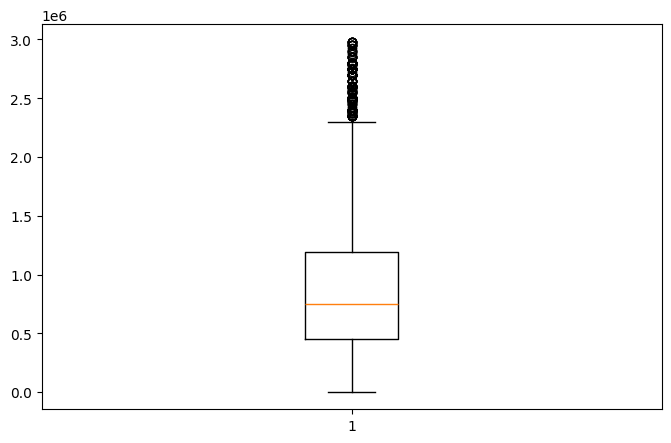

In [54]:
plt.figure(figsize=(8, 5))
plt.boxplot(precios2)
plt.show()

In [39]:
consultaPrecioPorCama = """
                        SELECT PRICE, BEDS
                        FROM data
                        WHERE PRICE > $lower_bound AND PRICE < $upper_bound
                        """

consultaPrecioPorTipo = """
                        SELECT PRICE, TYPE
                        FROM data
                        WHERE PRICE > $lower_bound AND PRICE < $upper_bound
                        """

In [40]:
precioPorCama = sql^consultaPrecioPorCama
precioPorTipo = sql^consultaPrecioPorTipo

In [52]:
consultaCamas = """
                SELECT DISTINCT BEDS, AVG(PRICE)
                FROM precioPorCama
                GROUP BY BEDS
                ORDER BY AVG(PRICE) ASC
                """

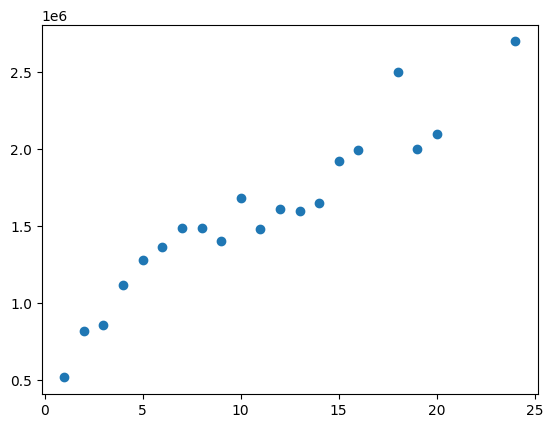

In [69]:
camas = sql^consultaCamas
plt.scatter(camas["BEDS"],camas["avg(PRICE)"])

In [70]:
from sklearn.linear_model import LinearRegression

In [74]:
camasModelo = np.array(camas["BEDS"]).reshape(-1,1)
promedioModelo = np.array(camas["avg(PRICE)"])

In [75]:
model = LinearRegression().fit(camasModelo, promedioModelo)

In [76]:
r_sq = model.score(camasModelo, promedioModelo)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9010570148666046


In [77]:
promedioPred = model.intercept_ + model.coef_*camasModelo

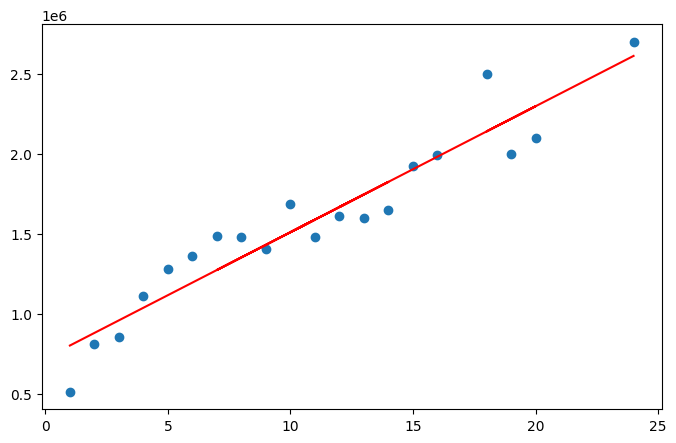

In [80]:
plt.figure(figsize=(8,5))
plt.plot(camasModelo,promedioPred, color="red")
plt.scatter(camasModelo,promedioModelo)
plt.show()

In [66]:
consultaTipo = """
                SELECT DISTINCT TYPE, AVG(PRICE)
                FROM precioPorTipo
                GROUP BY TYPE
                ORDER BY AVG(PRICE) DESC
                """

([<matplotlib.patches.Wedge at 0x239e8310>,
 [Text(1.0370818558084802, 0.366689547646015, 'Townhouse for sale'),
  Text(0.5977649243584895, 0.9234051630821053, 'Mobile house for sale'),
  Text(-0.05326339930109658, 1.0987097024668946, 'Multi-family home for sale'),
  Text(-0.6594519827965061, 0.8804107464051975, 'Coming Soon'),
  Text(-1.022754573887436, 0.4049358981275054, 'For sale'),
  Text(-1.0905290693295322, -0.14403592936231074, 'Condop for sale'),
  Text(-0.8965918779247248, -0.6372778078981062, 'House for sale'),
  Text(-0.500296741820701, -0.9796444100404957, 'Condo for sale'),
  Text(-0.008085988006824859, -1.099970279961215, 'Pending'),
  Text(0.4302386681984153, -1.0123708255312647, 'Land for sale'),
  Text(0.7648823979957228, -0.7905409016846079, 'Contingent'),
  Text(0.9893675120352857, -0.48078261837249164, 'Foreclosure'),
  Text(1.0887793976548854, -0.15671446404931894, 'Co-op for sale')])

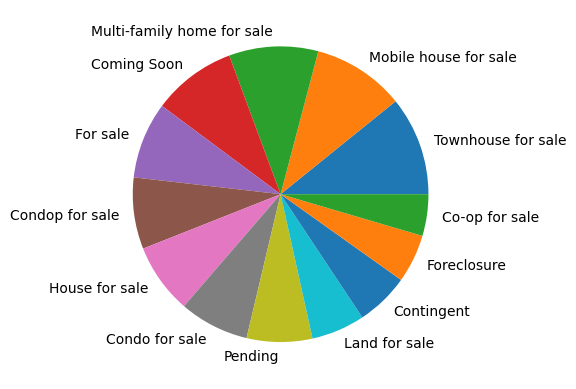

In [67]:
tipos = sql^consultaTipo
plt.pie(tipos["avg(PRICE)"],labels = tipos["TYPE"])